# Homework #7 Bodie Franklin

## Pull Data from Homework #5

In [1]:
%%time
import bs4 as bs
import urllib.request
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
import itertools
import nltk
from nltk.tokenize import word_tokenize
import pprint
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk    import SnowballStemmer
from unidecode    import unidecode
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn import cluster
import matplotlib.pyplot  as plt

Wall time: 1.87 s


In [2]:
%%time
reviews = []
review_link = []

the_dark_knight = "https://www.imdb.com/title/tt0468569/reviews?ref_=tt_urv"
sauce= urllib.request.urlopen(the_dark_knight).read()
soup = bs.BeautifulSoup(sauce,'lxml')
    
for a in soup.find_all('a',href=True):
        reviews.append(a['href'])

Infinite = "https://www.imdb.com/title/tt6654210/reviews?ref_=tt_urv"
sauce= urllib.request.urlopen(Infinite).read()
soup = bs.BeautifulSoup(sauce,'lxml')
    
for a in soup.find_all('a',href=True):
        reviews.append(a['href'])
        
Awake = "https://www.imdb.com/title/tt10418662/reviews?ref_=tt_urv"
sauce= urllib.request.urlopen(Awake).read()
soup = bs.BeautifulSoup(sauce,'lxml')
    
for a in soup.find_all('a',href=True):
        reviews.append(a['href'])
        

F9 = "https://www.imdb.com/title/tt5433138/reviews?ref_=tt_urv"
sauce= urllib.request.urlopen(F9).read()
soup = bs.BeautifulSoup(sauce,'lxml')
    
for a in soup.find_all('a',href=True):
        reviews.append(a['href'])
                

hitman_wife = "https://www.imdb.com/title/tt8385148/reviews?ref_=tt_urv"
sauce= urllib.request.urlopen(hitman_wife).read()
soup = bs.BeautifulSoup(sauce,'lxml')
    
for a in soup.find_all('a',href=True):
        reviews.append(a['href'])
            

    
PartialWord ="/review/"
clean_reviews = list(set([word for word in reviews if word.startswith(PartialWord)]))


for i in (clean_reviews):
    review_link.append('https://www.imdb.com/'+i+'?ref_=tt_urv')


Wall time: 2.86 s


In [3]:
%%time
reviews_text = []


for i in review_link:
    link = i
    sauce= urllib.request.urlopen(link).read()
    soup = bs.BeautifulSoup(sauce,'lxml')
    
    for div in soup.find_all('div',class_="text show-more__control"):
        reviews_text.append(div.text)

Wall time: 1min 3s


In [5]:
# removes a list of words (ie. stopwords) from a tokenized list.
def removeWords(listOfTokens, listOfWords):
    return [token for token in listOfTokens if token not in listOfWords]

# applies stemming to a list of tokenized words
def applyStemming(listOfTokens, stemmer):
    return [stemmer.stem(token) for token in listOfTokens]

# removes any words composed of less than 2 or more than 21 letters
def twoLetters(listOfTokens):
    twoLetterWord = []
    for token in listOfTokens:
        if len(token) <= 2 or len(token) >= 21:
            twoLetterWord.append(token)
    return twoLetterWord

In [6]:
def processCorpus(corpus, language):   
    stopwords = nltk.corpus.stopwords.words(language)
    param_stemmer = SnowballStemmer(language)
    
    
    for document in corpus:
        index = corpus.index(document)
        corpus[index] = corpus[index].replace(u'\ufffd', '8')   # Replaces the ASCII '�' symbol with '8'
        corpus[index] = corpus[index].replace(',', '')          # Removes commas
        corpus[index] = corpus[index].rstrip('\n')              # Removes line breaks
        corpus[index] = corpus[index].casefold()                # Makes all letters lowercase
        
        corpus[index] = re.sub('\W_',' ', corpus[index])        # removes specials characters and leaves only words
        corpus[index] = re.sub("\S*\d\S*"," ", corpus[index])   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
        corpus[index] = re.sub("\S*@\S*\s?"," ", corpus[index]) # removes emails and mentions (words with @)
        corpus[index] = re.sub(r'http\S+', '', corpus[index])   # removes URLs with http
        corpus[index] = re.sub(r'www\S+', '', corpus[index])    # removes URLs with www

        listOfTokens = word_tokenize(corpus[index])
        twoLetterWord = twoLetters(listOfTokens)

        listOfTokens = removeWords(listOfTokens, stopwords)
        listOfTokens = removeWords(listOfTokens, twoLetterWord)
        listOfTokens = applyStemming(listOfTokens, param_stemmer)
        corpus[index]   = " ".join(listOfTokens)
        corpus[index] = unidecode(corpus[index])

    return corpus

In [7]:
%%time
language = 'english'
corpus = processCorpus(reviews_text, language)

Wall time: 219 ms


In [8]:
%%time
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(5, 0)

125 rows
Wall time: 13.7 ms


,0,1,2,3,4,5,6,7,8,9,...,115,116,117,118,119,120,121,122,123,124
solut,0.323121,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
peopl,0.172471,0.0,0.0,0.0,0.0,0.051431,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.092859,0.0,0.119298,0.0,0.062774,0.0
agre,0.161560,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
error,0.161560,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
extra,0.161560,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0


# Question #1

Wall time: 19.9 ms
Wall time: 73.1 ms


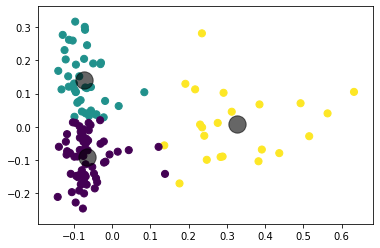

In [9]:
%%time
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

n_clusters = 3
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(final_df)
kmeans = KMeans(n_clusters= n_clusters, max_iter=600, algorithm = 'auto')
%time fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction ,s=50, cmap='viridis')

centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6)

C:\Users\bodie\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


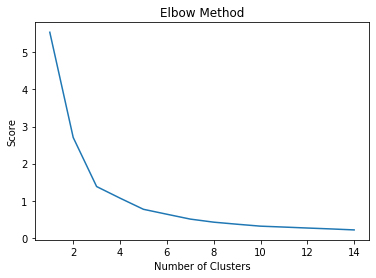

Wall time: 783 ms


In [10]:
%%time
number_clusters = range(1, 15)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score = [i*-1 for i in score]

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

## K-means consistency

Wall time: 2.99 ms


C:\Users\bodie\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


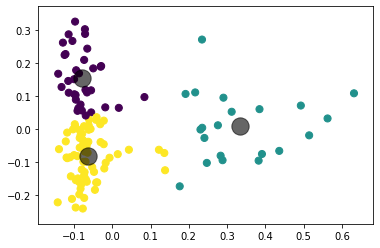

In [11]:
from sklearn.cluster import DBSCAN

n_clusters = 3
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(final_df)
kmeans = KMeans(
    init='k-means++',    
    n_clusters=n_clusters,    
    n_init=1,         
    n_jobs=-1)
%time fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction ,s=50, cmap='viridis')

centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6)

## Question #2

Based on the graphs above, it seems that the clusters are stuck on the genre that each movie belows too. This seems pretty straight forward.

## Question #3

The clusters performed the same.  Therefore, the cluster varations are indifferent since they are producing the same result.
